## Advanced Lane Finding Project

The goals / steps of this project are the following:

* Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.
* Apply a distortion correction to raw images.
* Use color transforms, gradients, etc., to create a thresholded binary image.
* Apply a perspective transform to rectify binary image ("birds-eye view").
* Detect lane pixels and fit to find the lane boundary.
* Determine the curvature of the lane and vehicle position with respect to center.
* Warp the detected lane boundaries back onto the original image.
* Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.

---


## Import Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import glob
import os
import matplotlib.image as mpimg
from skimage import io

# Helper functions are defined
# in helper_functions.py
from helper_functions import *

## Compute the camera calibration using chessboard images

In [2]:
ret, mtx, dist = calibrate()

## Read test image

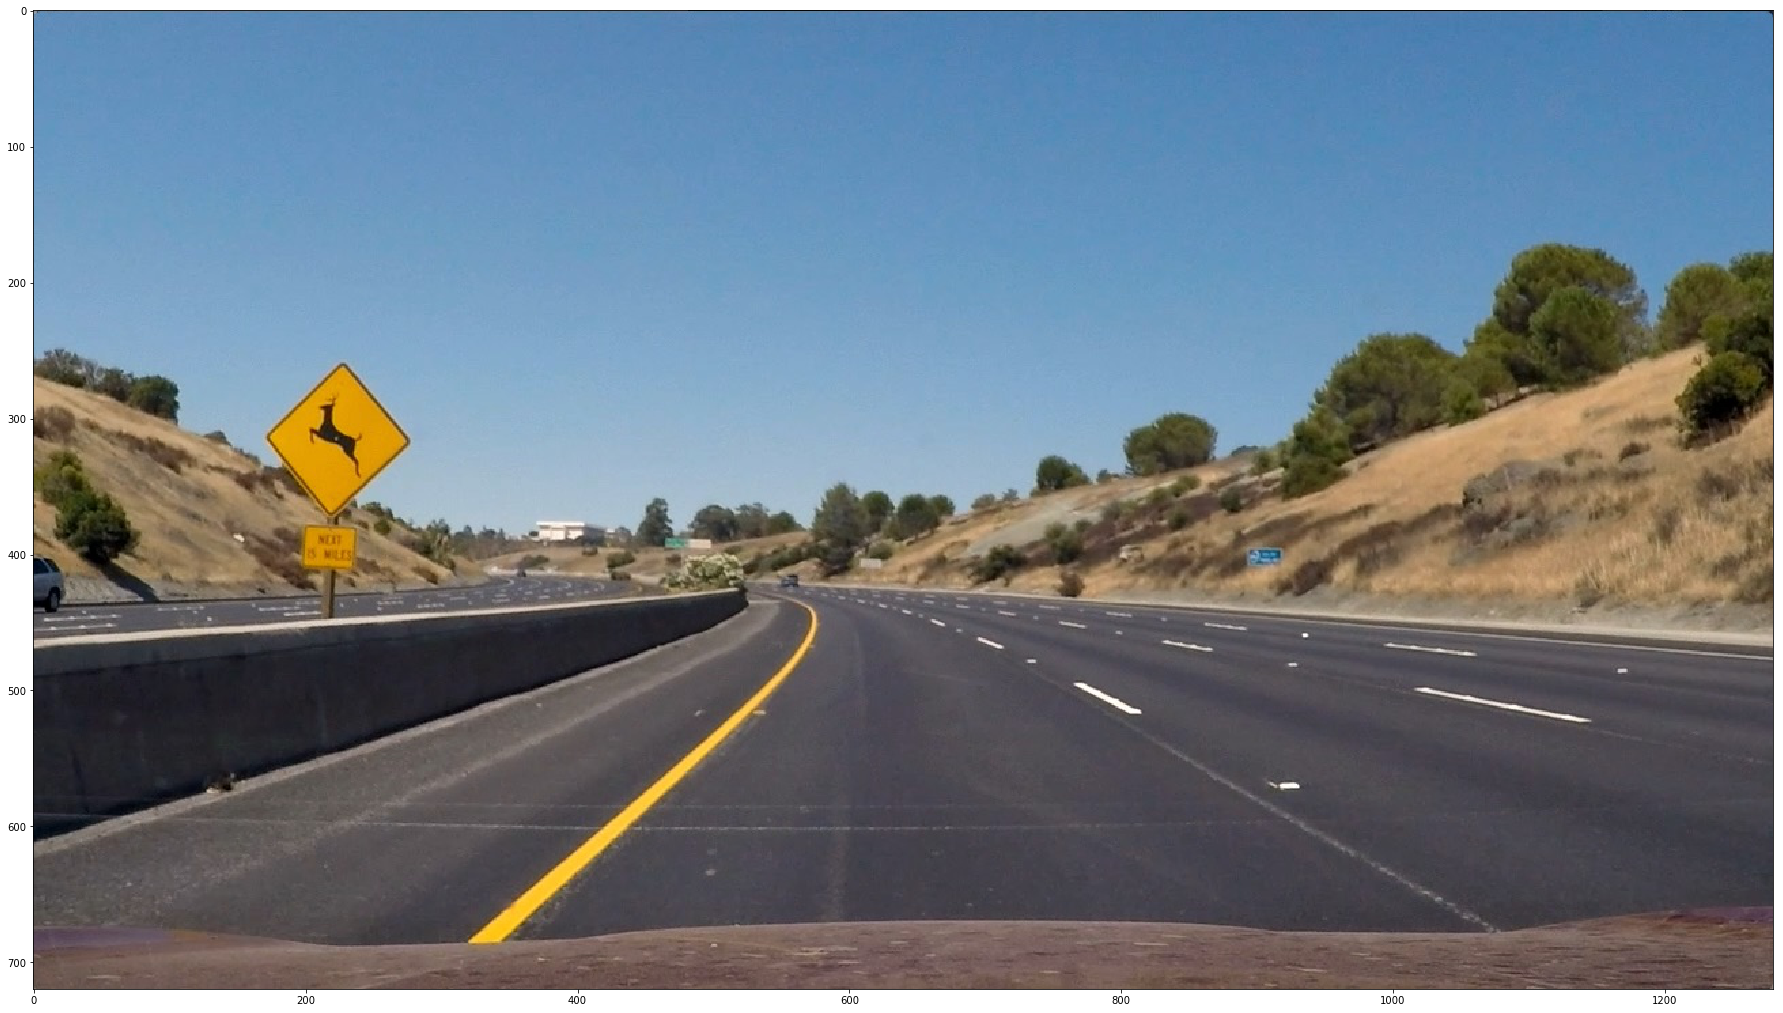

In [3]:
test_img = mpimg.imread('test_images/test2.jpg')

display_image(test_img)

## Use color transforms, gradients, etc., to create a thresholded binary image.

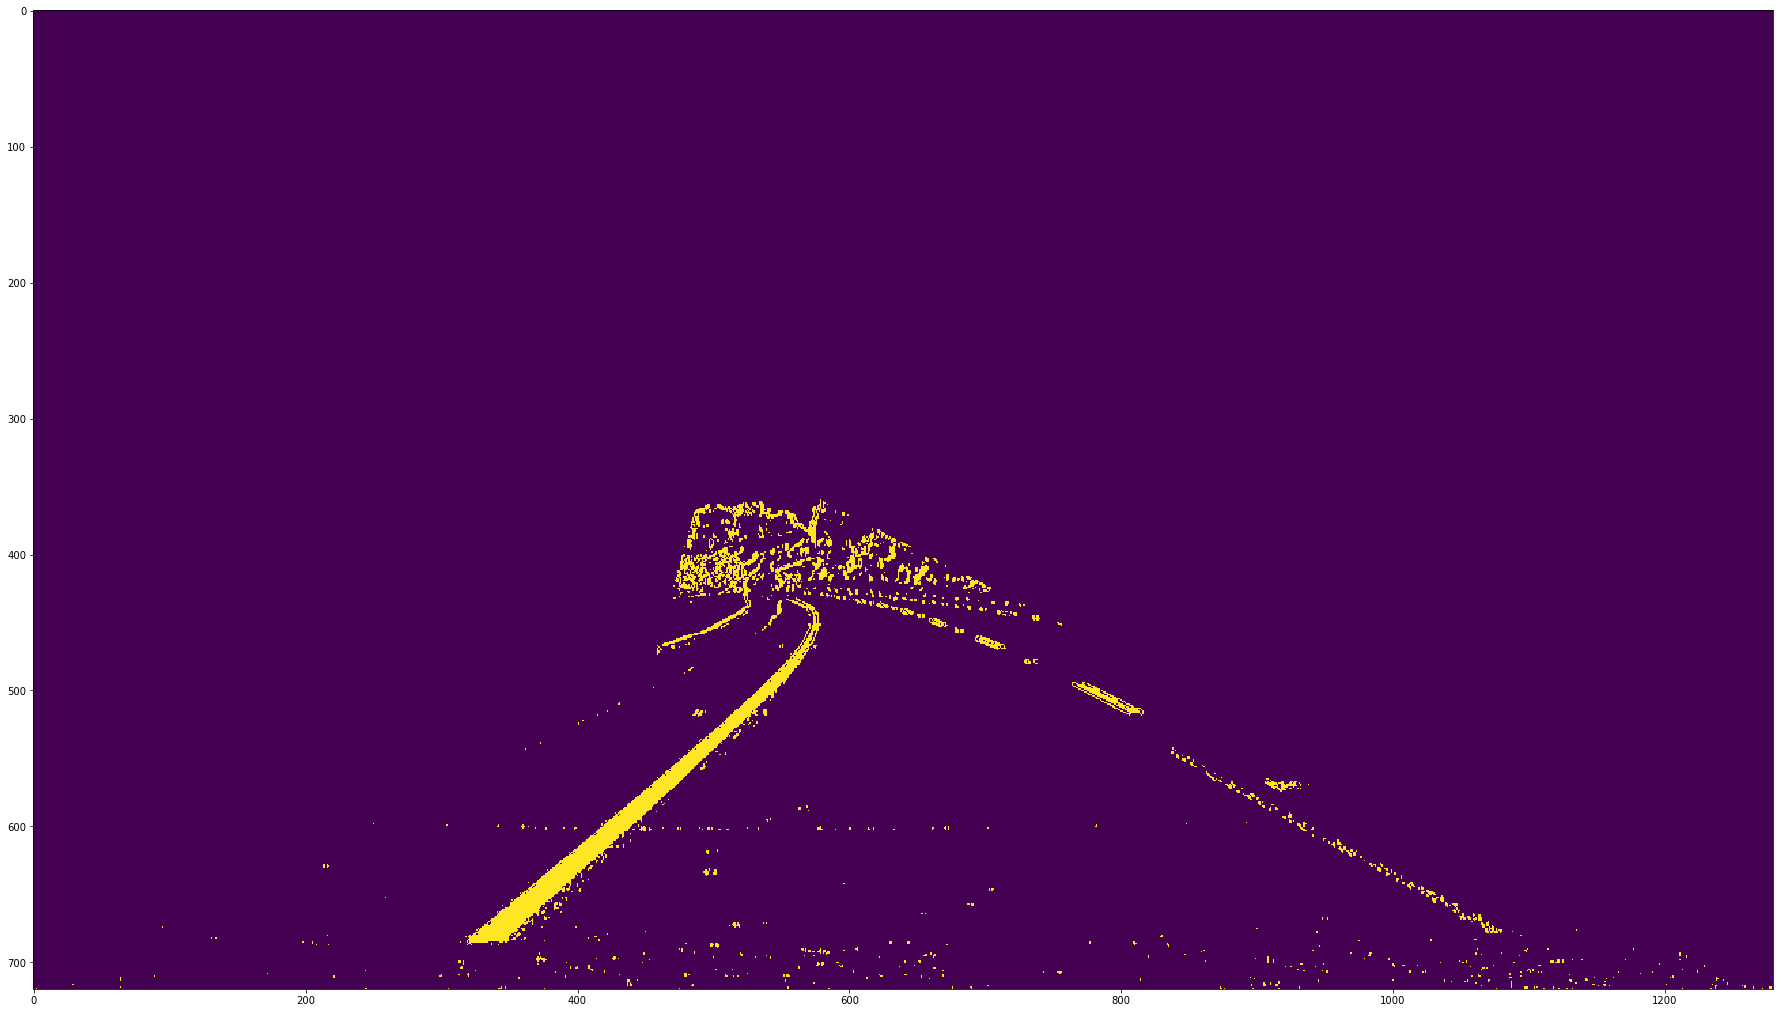

In [4]:
transformed_img = transform(test_img)

display_image(transformed_img)

##  Apply a perspective transform to rectify binary image

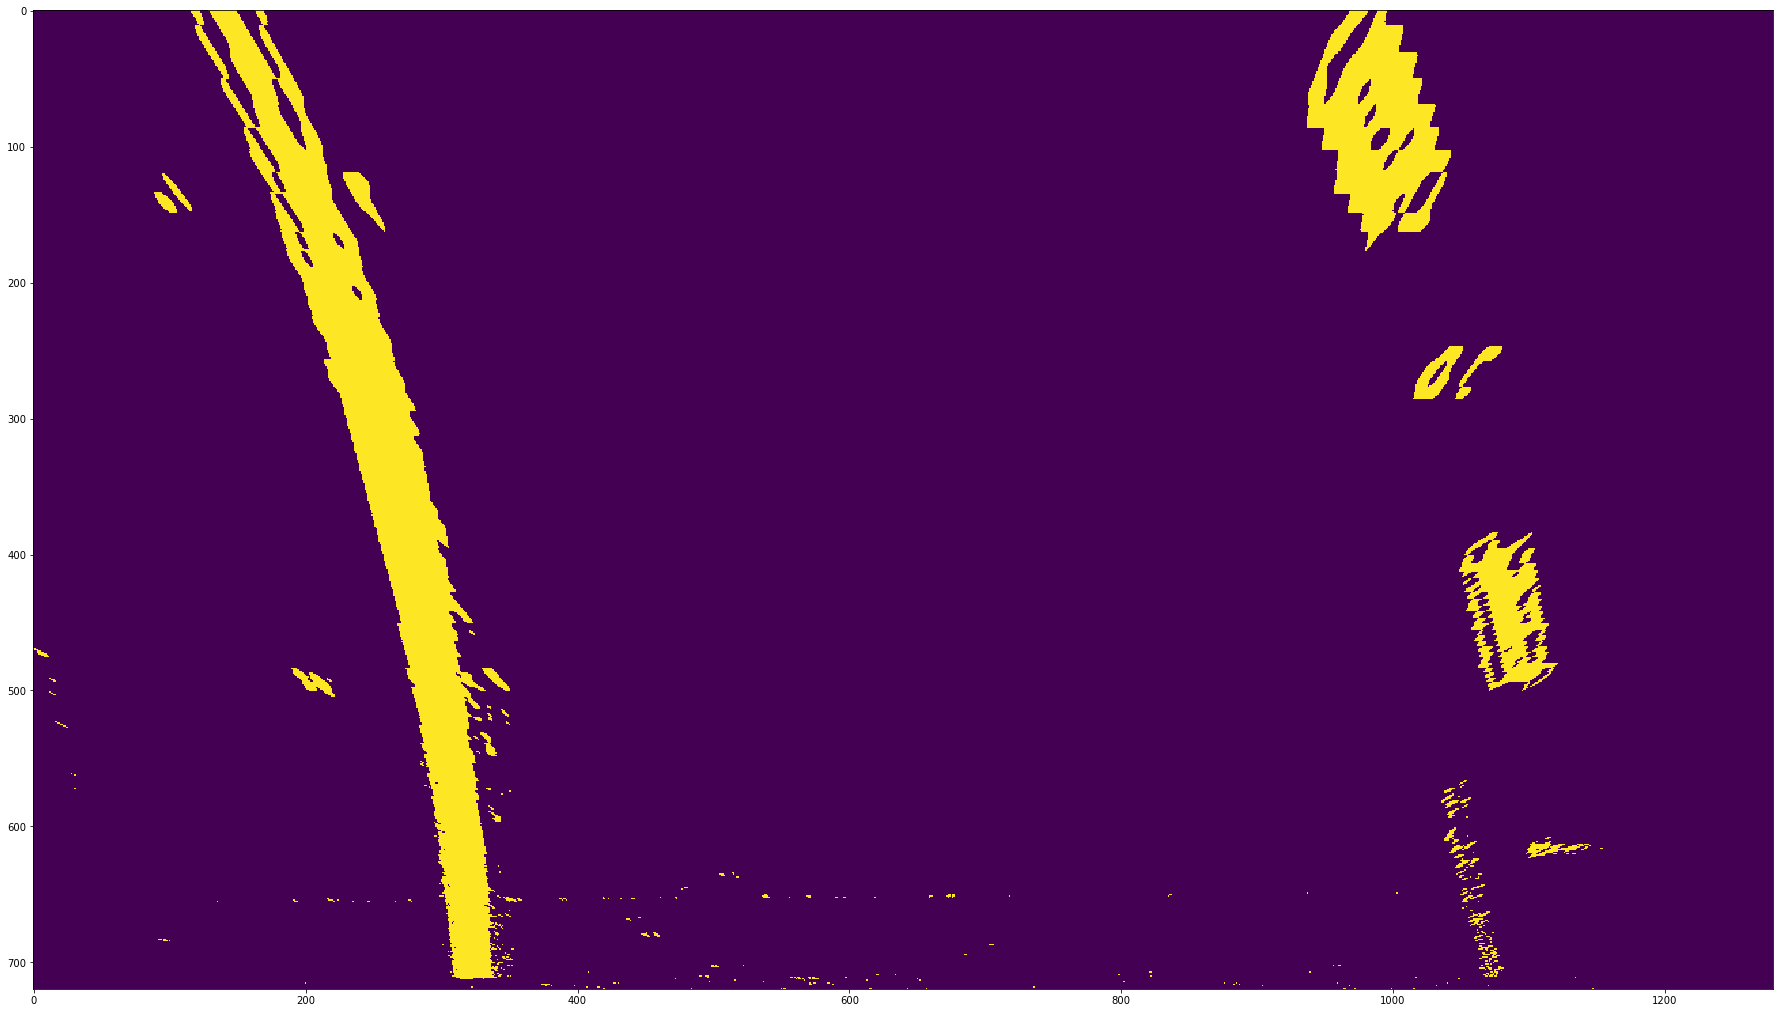

In [5]:
warped, M, Minv = unwarp(transformed_img, 9, 6, mtx, dist)

display_image(warped)

## Detect lane pixels and fit to find the lane boundary.

In [6]:
leftx_base, rightx_base = get_max_points(warped)

print("Left lane pixel: %d, Right lane pixel: %d" %(leftx_base, rightx_base))

Left lane pixel: 309, Right lane pixel: 1082


## Determine the curvature of the lane and vehicle position with respect to center.


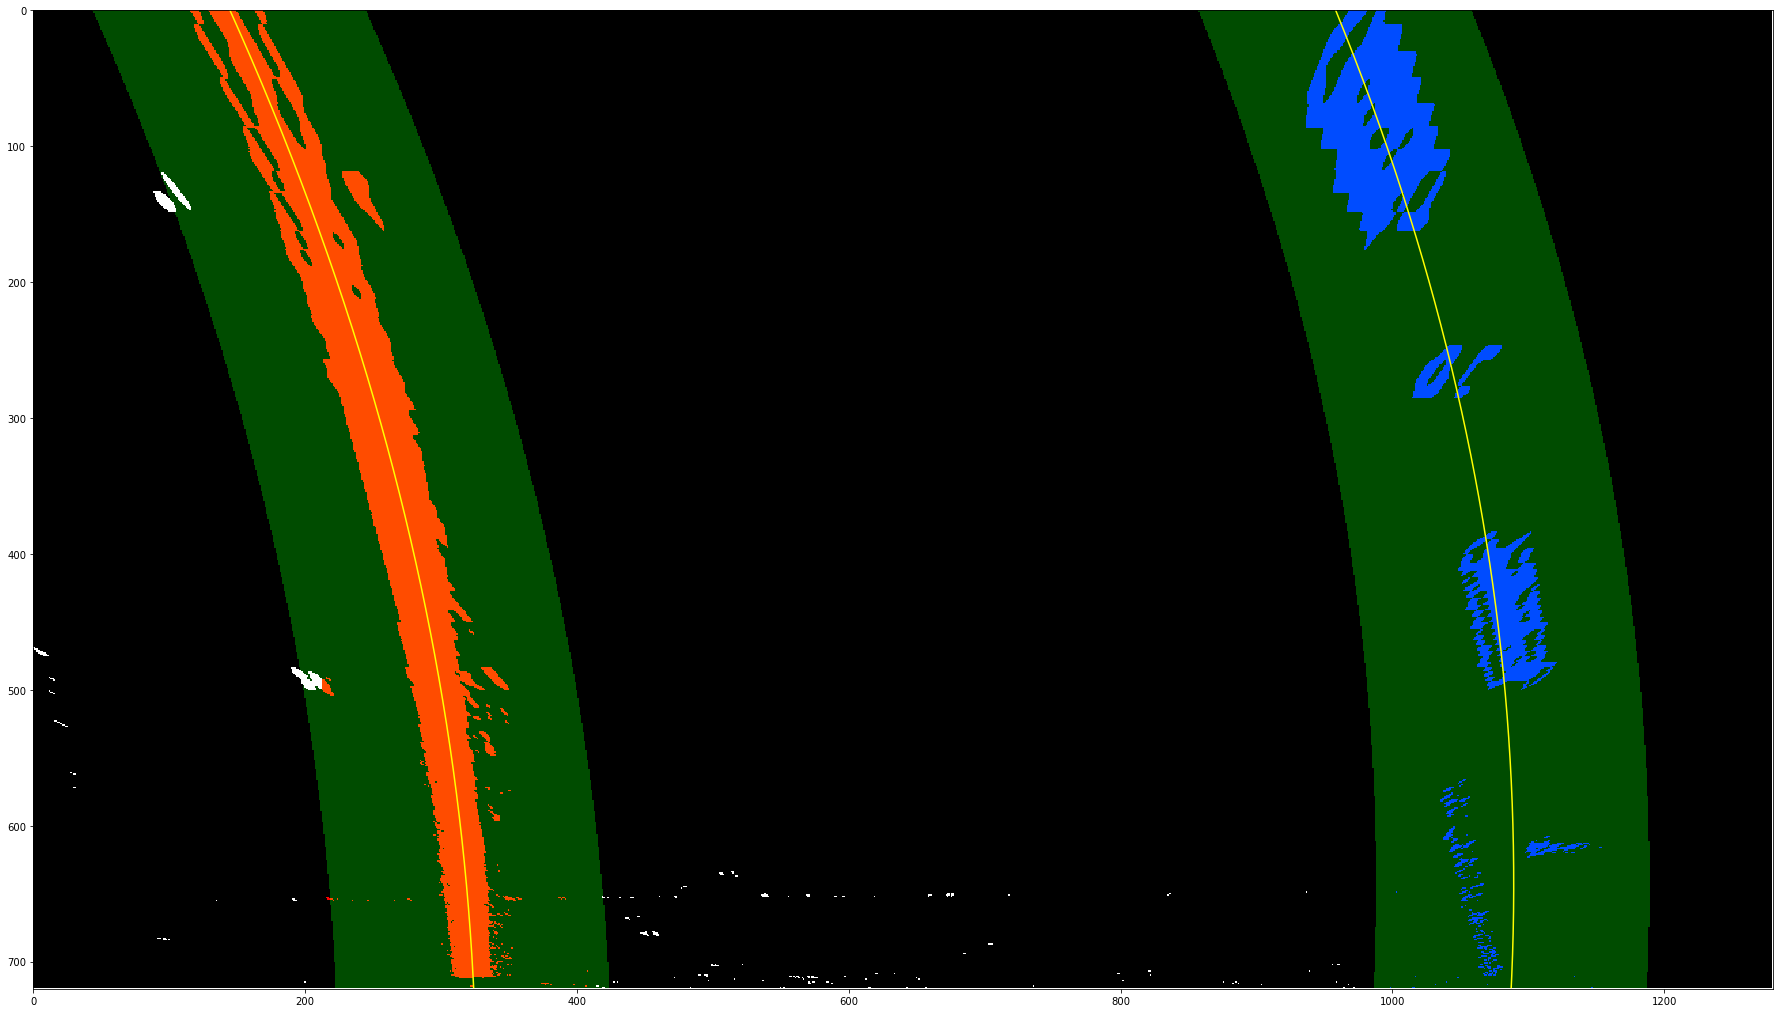

In [7]:
left_lane_inds, right_lane_inds = get_lane_indices(warped, leftx_base, rightx_base)
ploty, left_fitx, right_fitx = get_fitted_poly(warped, left_lane_inds, right_lane_inds)
plot_curvature(warped, left_lane_inds, right_lane_inds, ploty, left_fitx, right_fitx)

## Warp the detected lane boundaries back onto the original image

In [8]:
final_img = draw_lines(test_img, warped, ploty, left_fitx, right_fitx, Minv)

## Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.

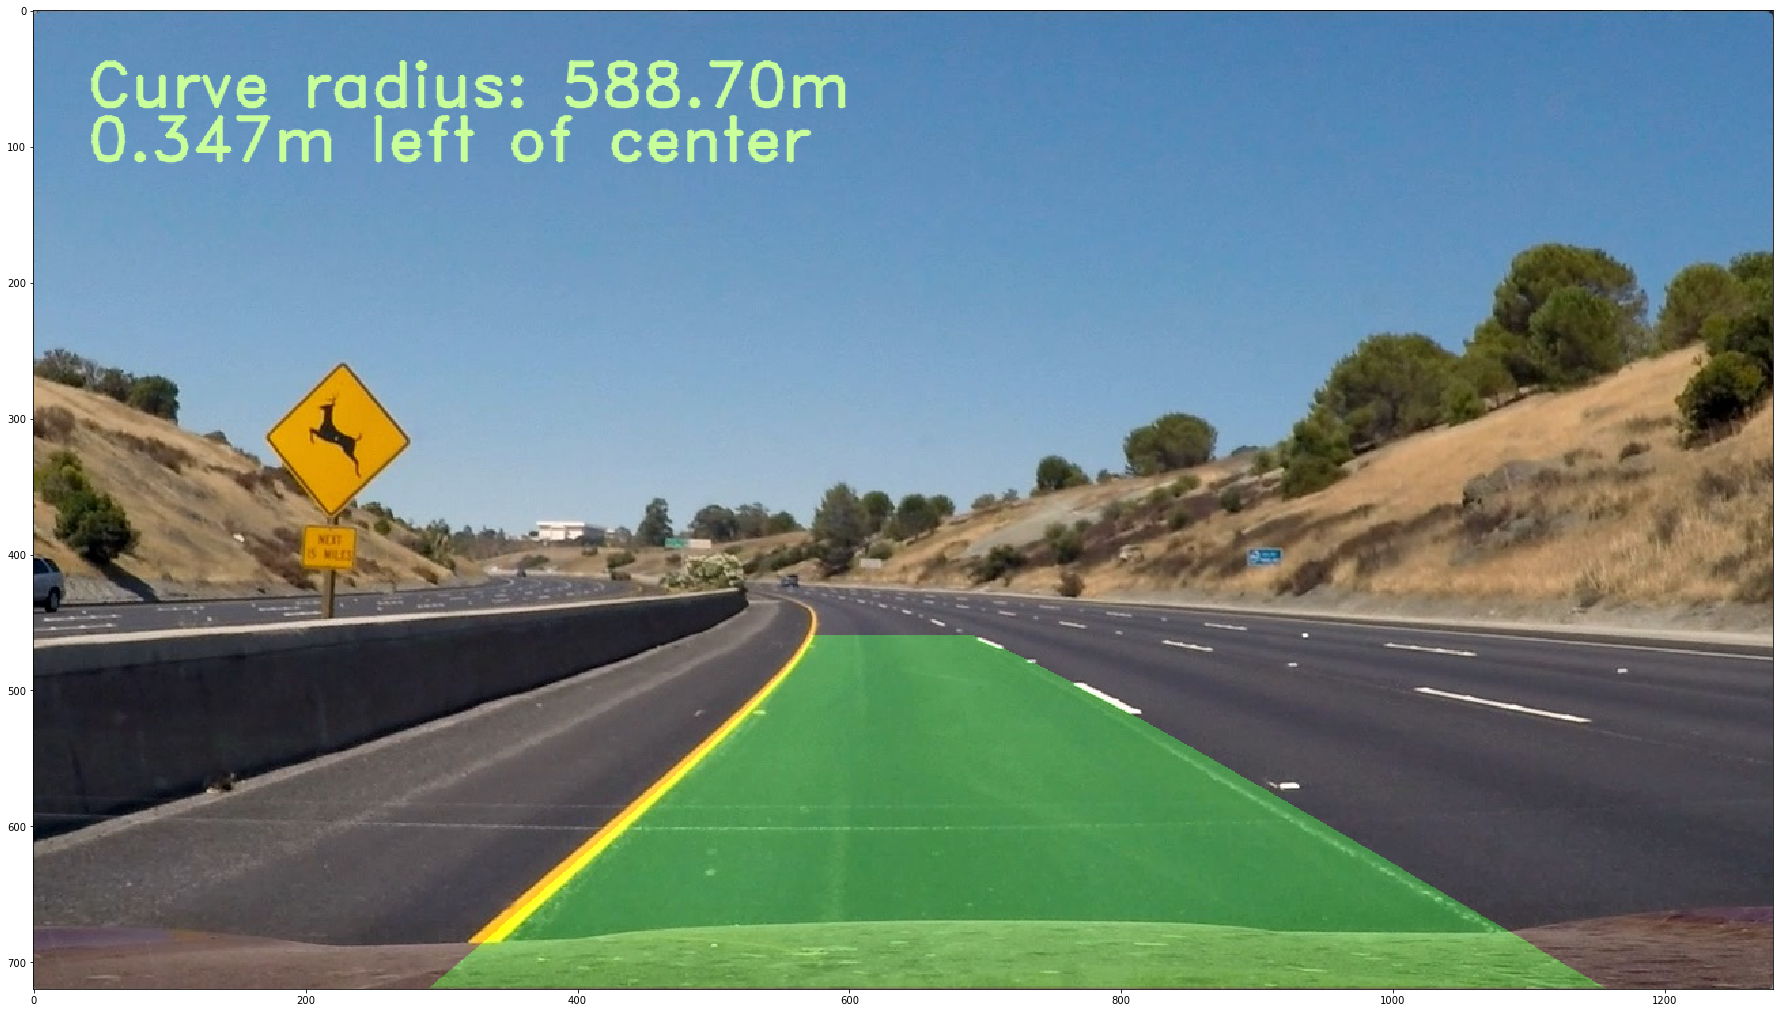

In [9]:
add_radius_to_img(final_img, ploty, left_fitx, right_fitx)

display_image(final_img)

## Generate output images for all test images

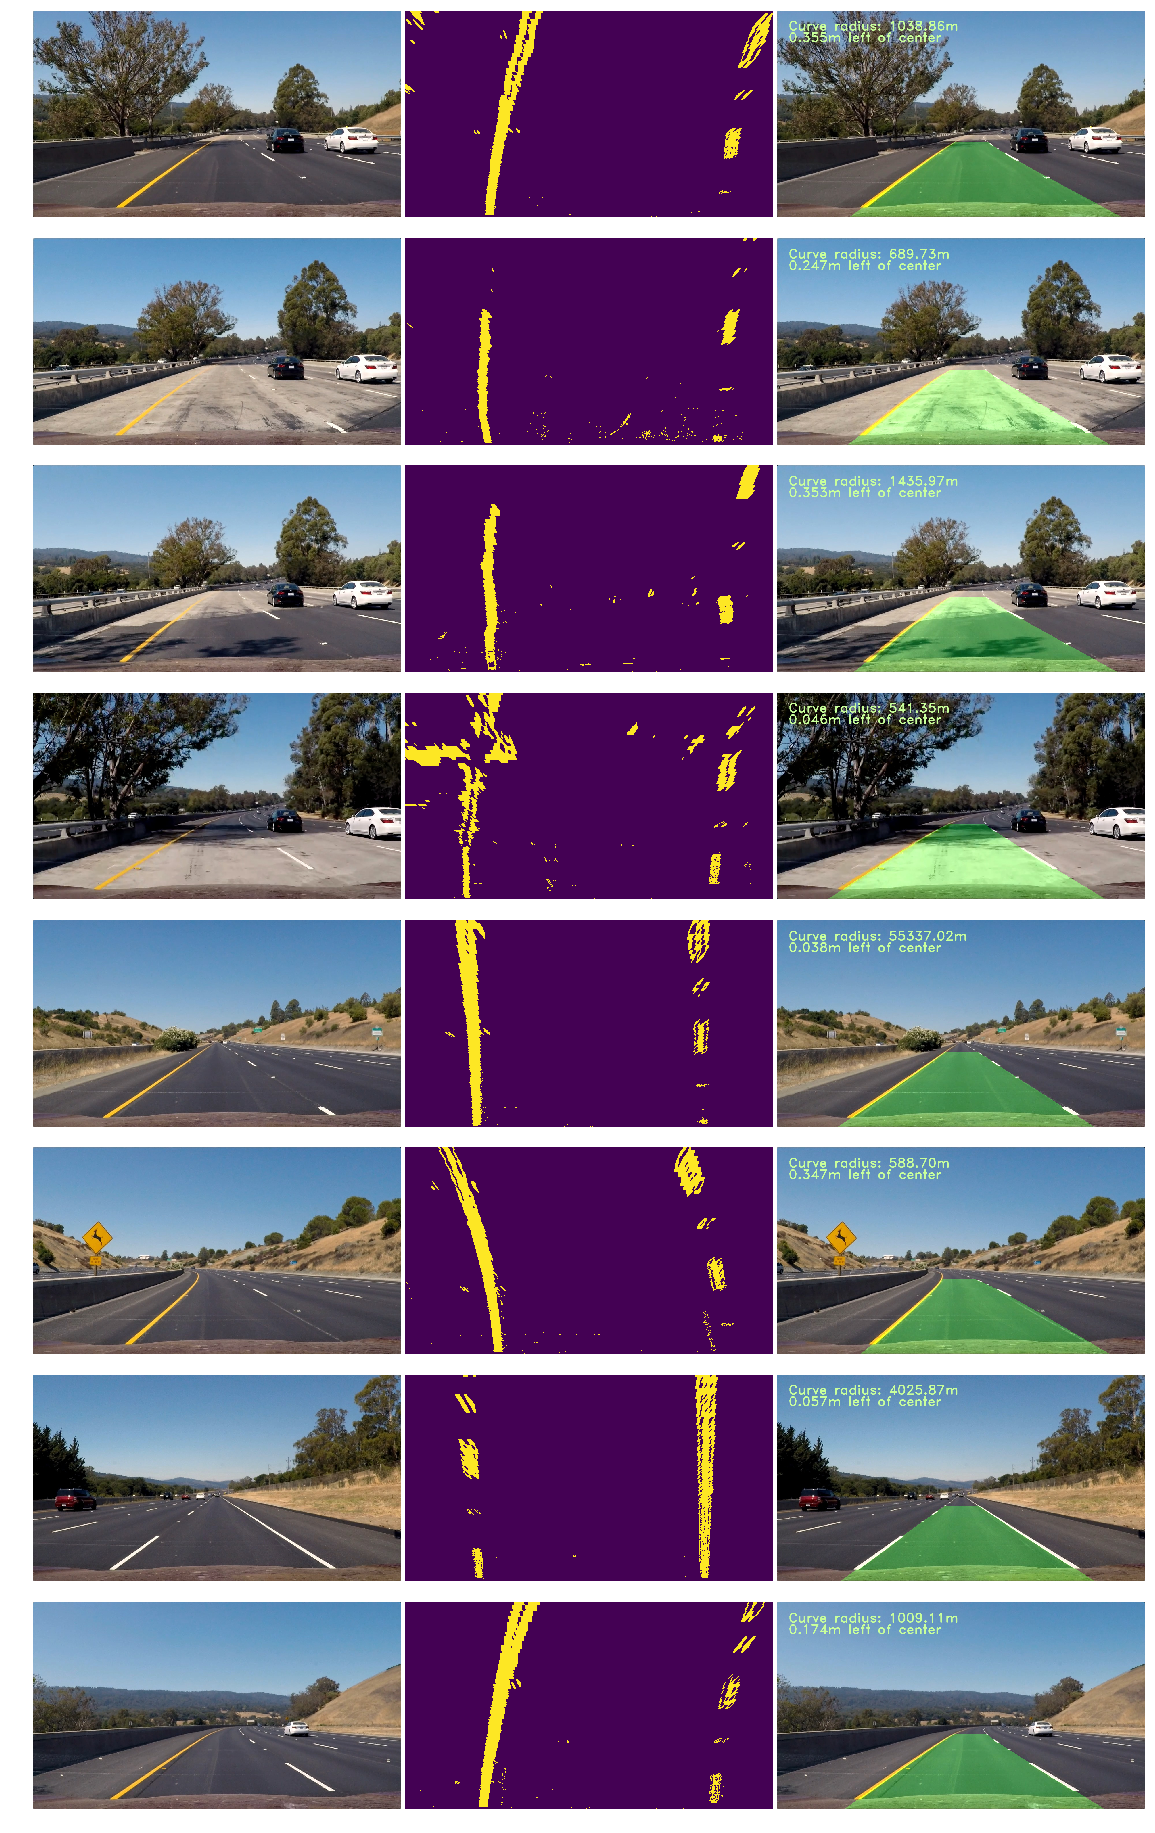

In [17]:
idx = 1
plt.figure(figsize=(20,100))
for img_file in os.listdir('test_images'):
    test_img = mpimg.imread('test_images/'+img_file)
    plt.subplot(24, 3, idx)
    plt.imshow(test_img)
    idx = idx+1
    plt.axis('off')

    nx = 9
    ny = 6
    masked_img = transform(test_img)
    warped, M, Minv = unwarp(masked_img, nx, ny, mtx, dist)
    plt.subplot(24, 3, idx)
    plt.imshow(warped)
    idx = idx+1
    plt.axis('off')
  
    leftx_base, rightx_base = get_max_points(warped)
    left_lane_inds, right_lane_inds = get_lane_indices(warped, leftx_base, rightx_base)
    ploty, left_fitx, right_fitx = get_fitted_poly(warped, left_lane_inds, right_lane_inds)
    final_img = draw_lines(test_img, warped, ploty, left_fitx, right_fitx, Minv)
    add_radius_to_img(final_img, ploty, left_fitx, right_fitx)
    io.imsave('output_images/'+img_file, final_img)
    
    plt.subplot(24, 3, idx)
    plt.imshow(final_img)
    idx = idx+1
    plt.axis('off')
 
plt.subplots_adjust(wspace=0, hspace=0.1)
plt.show()

## Generate output video with lanes

In [18]:
input_video = 'project_video.mp4' 
clip1 = VideoFileClip(input_video)
output_file = 'output_project_video.mp4'
output_clip = clip1.fl_image(lambda img: all_steps(img, mtx, dist))
output_clip.write_videofile(output_file, audio=False)

[MoviePy] >>>> Building video output_project_video.mp4
[MoviePy] Writing video output_project_video.mp4


100%|█████████▉| 1260/1261 [01:43<00:00, 13.33it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: output_project_video.mp4 

